In [1]:
import os
import requests
from tqdm import tqdm
import scipy.io
import numpy as np
from importlib import reload

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Hagmann Individual Connectomes

In [2]:
url = "https://zenodo.org/records/2872624/files/Individual_Connectomes.mat?download=1"
local_filename = "Hagmann_Individual_Connectomes.mat"

if not os.path.exists(local_filename):
    print("Downloading the Hagmann dataset...")

    response = requests.get(url, stream = True)
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024 # 1 KB
    with open(local_filename, 'wb') as file, tqdm(
        desc=local_filename,
        total=total_size, 
        unit='iB',
        unit_scale=True
    ) as bar:
        for data in response.iter_content(block_size):
            file.write(data)
            bar.update(len(data))

    print("Download complete")
else:
    print(f"File '{local_filename}' already exists. Skipping download")

File 'Hagmann_Individual_Connectomes.mat' already exists. Skipping download


In [ ]:
print("Loading the .mat file...")
data = scipy.io.loadmat(local_filename)

In [ ]:
def inspect_keys(data):
    # Inspect keys
    for key in data.keys():
        print(f"KEY: [{key}]")
        if (isinstance(data[key], str)):
            print(data[key])
        elif (isinstance(data[key], bytes)):
            print(data[key])
        elif (isinstance(data[key], list)):
            print(data[key])
        elif (isinstance(data[key], np.ndarray)):
            print(data[key].shape)
            print(data[key])

# inspect_keys(data)

In [51]:
conn_data = data['connMatrices']
conn_container = conn_data[0, 0]

structural_list = conn_container[0].squeeze() # structural connectivity data
functional_list = conn_container[1].squeeze() # functional connectivity data

print("Structural connectivity matrices:")
for i, mat in enumerate(structural_list):
    print(f"  Scale {i} (approx. {mat.shape} nodes): shape = {mat.shape}")

print("\nFunctional connectivity matrices:")
for i, mat in enumerate(functional_list):
    print(f"  Scale {i} (approx. {mat.shape} nodes): shape = {mat.shape}")


Structural connectivity matrices:
  Scale 0 (approx. (68, 68, 70) nodes): shape = (68, 68, 70)
  Scale 1 (approx. (114, 114, 70) nodes): shape = (114, 114, 70)
  Scale 2 (approx. (219, 219, 70) nodes): shape = (219, 219, 70)
  Scale 3 (approx. (448, 448, 70) nodes): shape = (448, 448, 70)
  Scale 4 (approx. (1000, 1000, 70) nodes): shape = (1000, 1000, 70)

Functional connectivity matrices:
  Scale 0 (approx. (68, 68, 70) nodes): shape = (68, 68, 70)
  Scale 1 (approx. (114, 114, 70) nodes): shape = (114, 114, 70)
  Scale 2 (approx. (219, 219, 70) nodes): shape = (219, 219, 70)
  Scale 3 (approx. (448, 448, 70) nodes): shape = (448, 448, 70)
  Scale 4 (approx. (1000, 1000, 70) nodes): shape = (1000, 1000, 70)


### Visualise SC and FC

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ~68 node structural connectivity:
structural_68 = structural_list[0]  # (68, 68, 70)
# avg_structural_68 = np.mean(structural_68, axis=2) # Average across subjects

for subject_index in range(5):
    indiv_structural_matrix = structural_68[:, :, subject_index]
    print(f"Subject {subject_index} SC shape: {indiv_structural_matrix.shape}")

    # Visualise as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(indiv_structural_matrix, cmap='viridis')
    plt.title(f"Average Structural Connectivity (68-node parcellation) - Subject {subject_index}")
    plt.xlabel("Region")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()


Subject 0 FC shape: (68, 68)


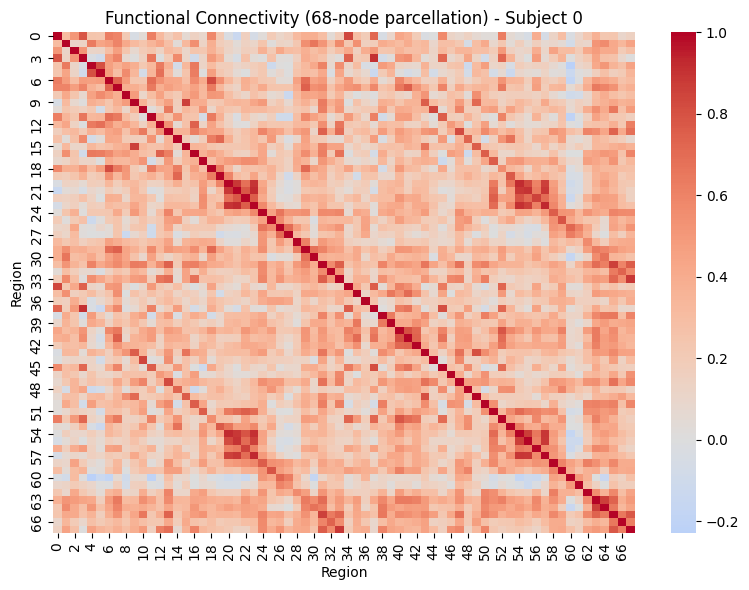

Subject 1 FC shape: (68, 68)


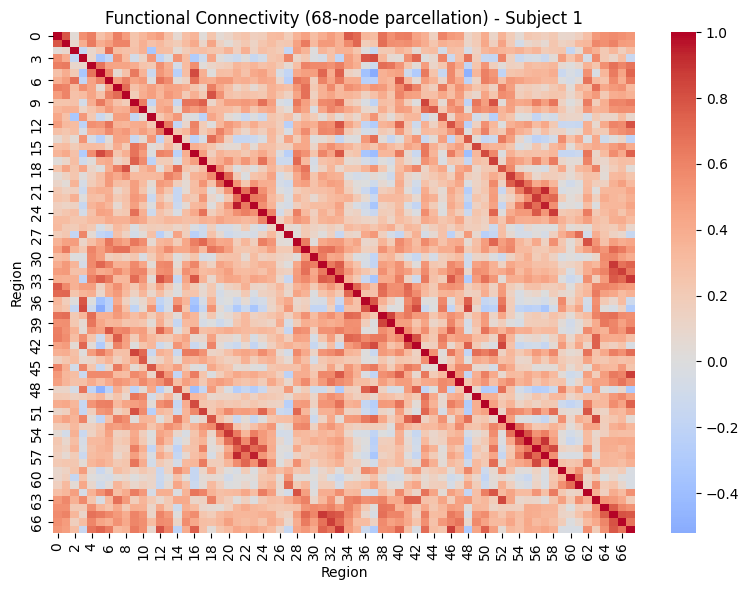

Subject 2 FC shape: (68, 68)


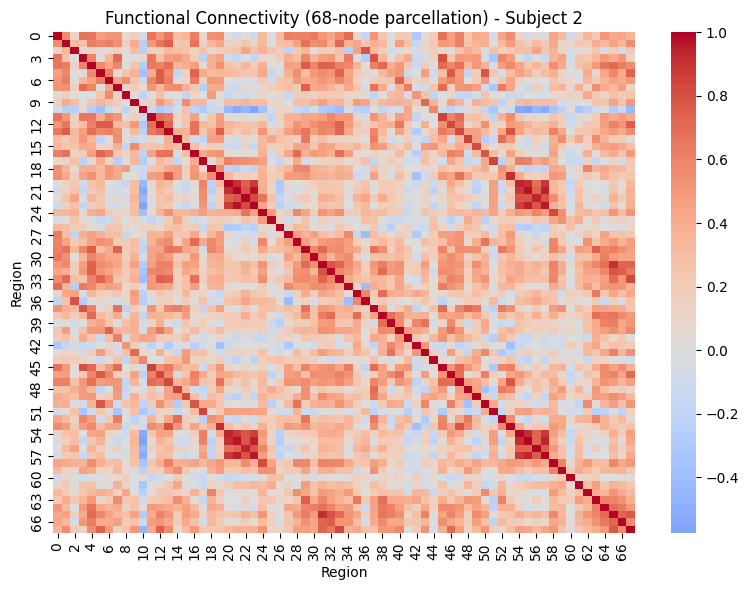

Subject 3 FC shape: (68, 68)


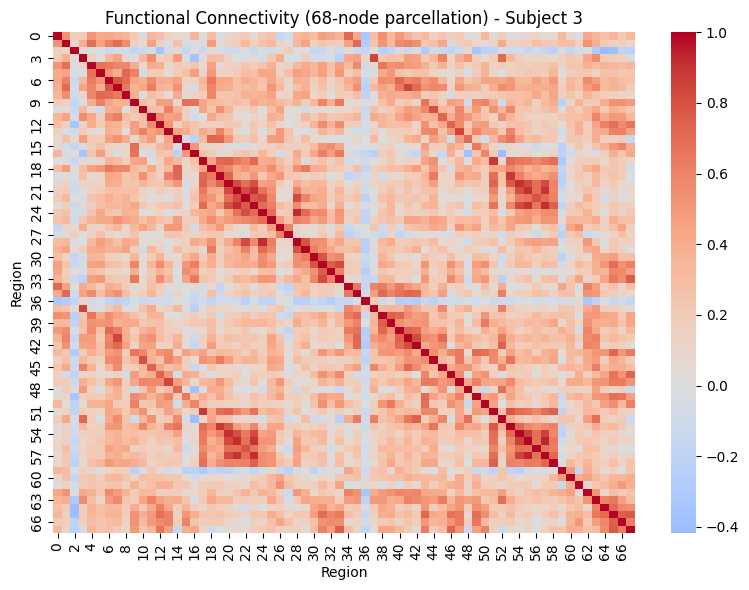

Subject 4 FC shape: (68, 68)


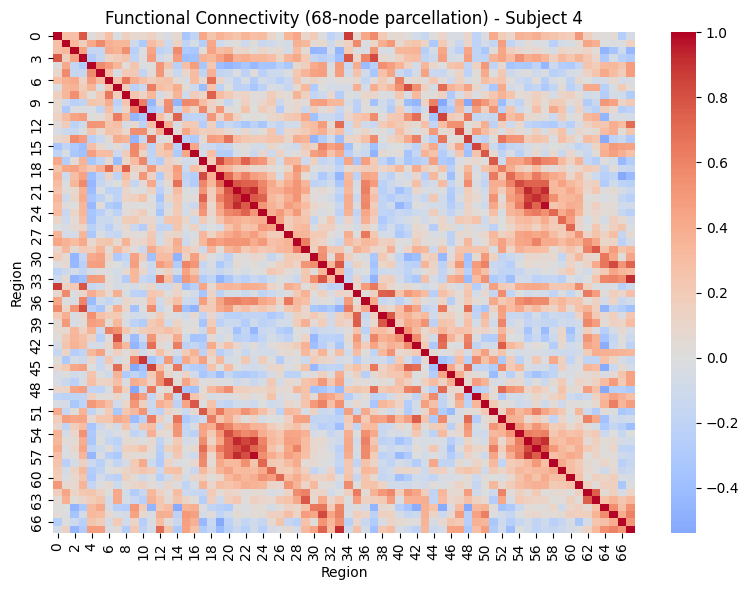

In [57]:
functional_68 = functional_list[0] # (68, 68, 70)

for subject_index in range(5):
    indiv_functional_matrix = functional_68[:, :, subject_index]
    print(f"Subject {subject_index} FC shape: {indiv_functional_matrix.shape}")

    # Diverging colormap centered at zero
    plt.figure(figsize=(8, 6))
    sns.heatmap(indiv_functional_matrix, cmap='coolwarm', center=0)
    plt.title(f"Functional Connectivity (68-node parcellation) - Subject {subject_index}")
    plt.xlabel("Region")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.show()


## HCP Data

In [6]:

fmri_filename = "HCP Data/BOLD Timeseries HCP.mat"
dti_filename = "HCP Data/DTI Fibers HCP.mat"

print("Loading .mat fMRI and DTI data")
bold_mat = scipy.io.loadmat(fmri_filename)
dti_mat = scipy.io.loadmat(dti_filename)

bold_data = bold_mat["BOLD_timeseries_HCP"]
dti_data  = dti_mat["DTI_fibers_HCP"] 

print('BOLD data shape: ', bold_data.shape)
print('DTI data shape: ', dti_data.shape)

Loading .mat fMRI and DTI data
BOLD data shape:  (100, 1)
DTI data shape:  (100, 1)


In [7]:
subject_index = 0
bold_subject = bold_data[subject_index, 0]
dti_subject  = dti_data[subject_index, 0]

print(f"BOLD subject {subject_index} shape:", bold_subject.shape)  # (100, 1189)
print(f"DTI subject {subject_index} shape:", dti_subject.shape)    # (100, 100)

BOLD subject 0 shape: (100, 1189)
DTI subject 0 shape: (100, 100)


In [31]:
dti = 0.5 * (dti_subject.T + dti_subject) # Make symmetric
dti = np.log1p(dti) / np.linalg.norm(np.log1p(dti)) # Log-Transform and Normalize

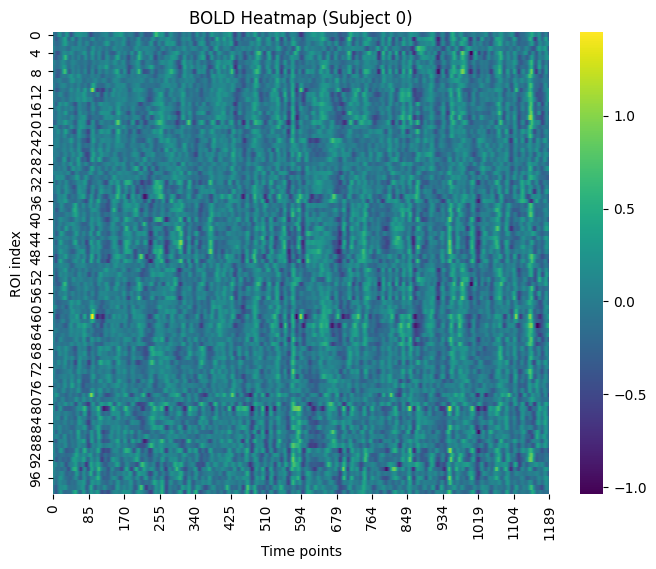

In [5]:
# Heatmap for BOLD vs. time
plt.figure(figsize=(8,6))
sns.heatmap(bold_subject, cmap='viridis')
x_times = np.linspace(0, bold_subject.shape[1], 15)
x_times = np.round(x_times).astype(int)
plt.xticks(x_times, x_times)
plt.title(f"BOLD Heatmap (Subject {subject_index})")
plt.xlabel("Time points")
plt.ylabel("ROI index")
plt.show()

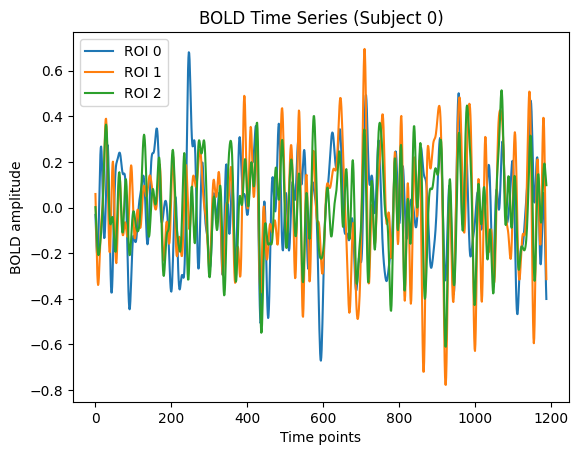

In [15]:
roi_indices = [0, 1, 2]  # pick any 3 ROIs
plt.figure()
for roi in roi_indices:
    plt.plot(bold_subject[roi, :], label=f"ROI {roi}")
plt.title(f"BOLD Time Series (Subject {subject_index})")
plt.xlabel("Time points")
plt.ylabel("BOLD amplitude")
plt.legend()
plt.show()


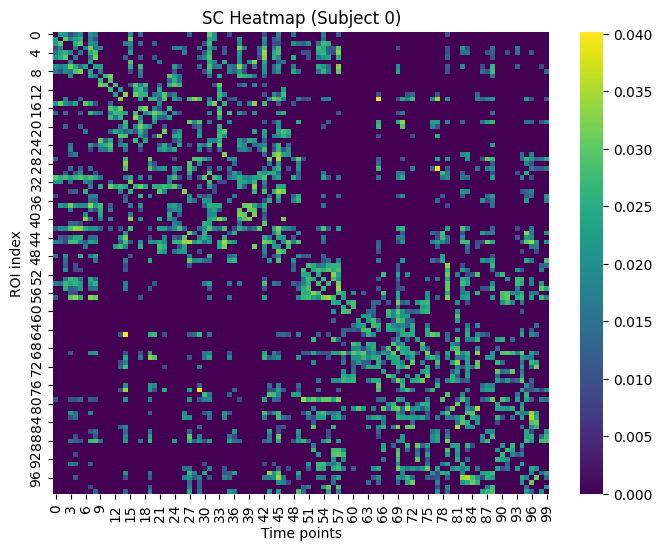

In [54]:
# Heatmap for SC
plt.figure(figsize=(8,6))
sns.heatmap(dti, cmap='viridis')
plt.title(f"SC Heatmap (Subject {subject_index})")
plt.xlabel("Time points")
plt.ylabel("ROI index")
plt.show()

### FC Costs and Comparisons

In [8]:
import costs

In [9]:
subject_index = 0
bold_subject_one = bold_data[0, 0]
bold_subject_two = bold_data[1, 0]

print(f"BOLD subject 1 shape:", bold_subject_one.shape)  # (100, 1189)
print(f"BOLD subject 2 shape:", bold_subject_two.shape)  # (100, 1189)

BOLD subject 1 shape: (100, 1189)
BOLD subject 2 shape: (100, 1189)


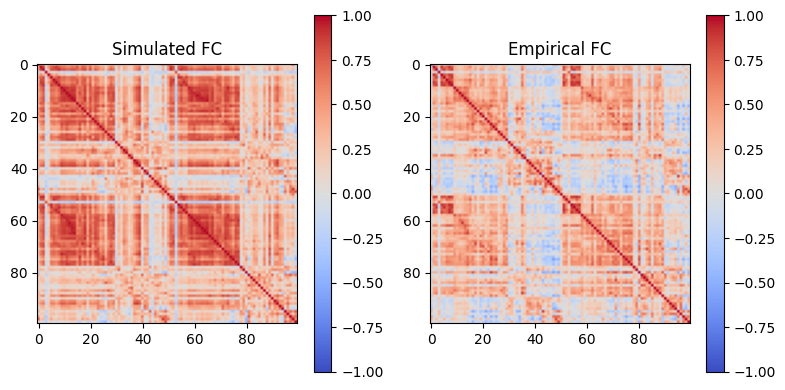

RMSE between BOLD time series: 0.3908
Average per-ROI Pearson correlation: -0.0453
FC Pearson's correlation: 0.6114


tensor(0.2160)

In [11]:
reload(costs)

costs_instance = costs.Costs()

costs_instance.compare_bold( bold_data[4, 0], bold_data[5, 0])

# Running main

In [3]:
import main
import torch

In [4]:
if torch.cuda.is_available():
    num_devices = torch.cuda.device_count()
    for i in range(num_devices):
        device = torch.cuda.device(i)
        total_mem = torch.cuda.get_device_properties(i).total_memory / 1024**3  # Convert to GB
        allocated_mem = torch.cuda.memory_allocated(i) / 1024**3  # Convert to GB
        free_mem = total_mem - allocated_mem

        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"Total Memory: {total_mem:.1f}GB")
        print(f"Allocated Memory: {allocated_mem:.1f}GB")
        print(f"Free Memory: {free_mem:.1f}GB")

        if free_mem < 8:
            print(f"Warning: GPU {i} has less than 8GB of free VRAM!")
        else:
            print(f"Using GPU {i} with {free_mem:.1f}GB free VRAM")
            break
    device = torch.device(f"cuda:{i}")
else:
    print("Warning: No CUDA devices available - running on CPU only")
    device = torch.device("cpu")
 

GPU 0: NVIDIA GeForce GTX 1080
Total Memory: 7.9GB
Allocated Memory: 0.0GB
Free Memory: 7.9GB


In [ ]:
reload(main)
main.main()